# Supervised Machine Learning

A code notebook for studying basic machine learning algorithms.

## Resources

* [matplotlib quick start guide](https://matplotlib.org/stable/tutorials/introductory/quick_start.html).
* [numpy learning section](https://numpy.org/learn/).

## Imports

The required libraries are:

* `numpy` to provide fast arrays in python.
* `matplotlib` for visualising data.
* `sklearn` for generating sample data.

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator, FormatStrFormatter)
import numpy as np
import sklearn.datasets
import math
%matplotlib inline

## Plot a test graph

Create a nice looking plot to test that the notebook is set up properly.

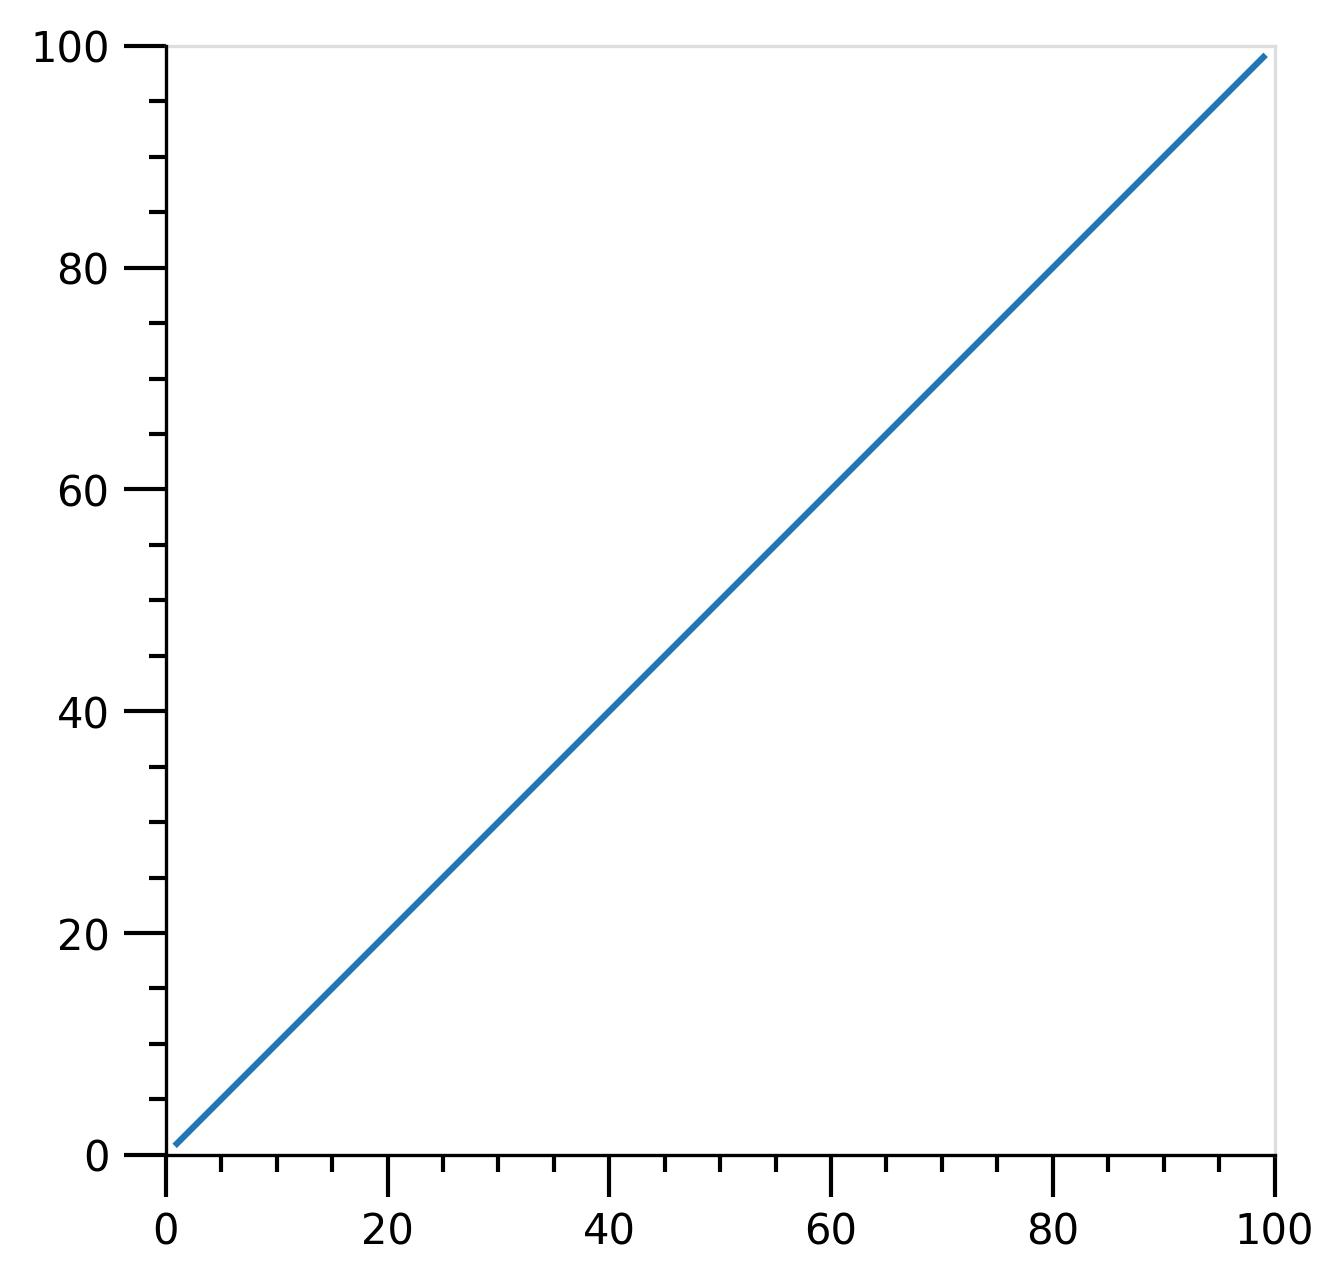

In [2]:
grid_color = "#dddddd"

f = plt.figure(dpi=300)
ax = f.add_subplot(1,1,1)
ax.set_xlim(0,100)
ax.set_ylim(0,100)
ax.spines['top'].set_color(grid_color)
ax.spines['left'].set(zorder=10)
ax.spines['right'].set_color(grid_color)
ax.axis("square")

ax.xaxis.set_major_locator(MultipleLocator(20))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(MultipleLocator(20))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))

ax.tick_params(which='minor', width=1, length=4, color="#000000")
ax.tick_params(which='major', width=1, length=10, color="#000000")

# ax.grid(which="minor", color=grid_color, linestyle="-", lw=0.5)
# ax.grid(which="major", color=grid_color, linestyle="-")

ax.plot([1,99], [1,99], marker="None", linestyle="-", markersize=1)

## Generate datasets

Use the `make_regression` function of scikit learn to generate a sample dataset with a single feature (see *univariate* below). Return the coefficient and create the linear function from which the dataset is generated.

In [3]:
r = sklearn.datasets.make_regression(n_samples = 200, n_features = 1, noise=5.5, coef=True)

x = r[0].ravel()
y = r[1]

m = r[2]

def f(w_1, x, w_0):
    return w_1 * x + w_0

z = np.linspace(-2, 2, 100)

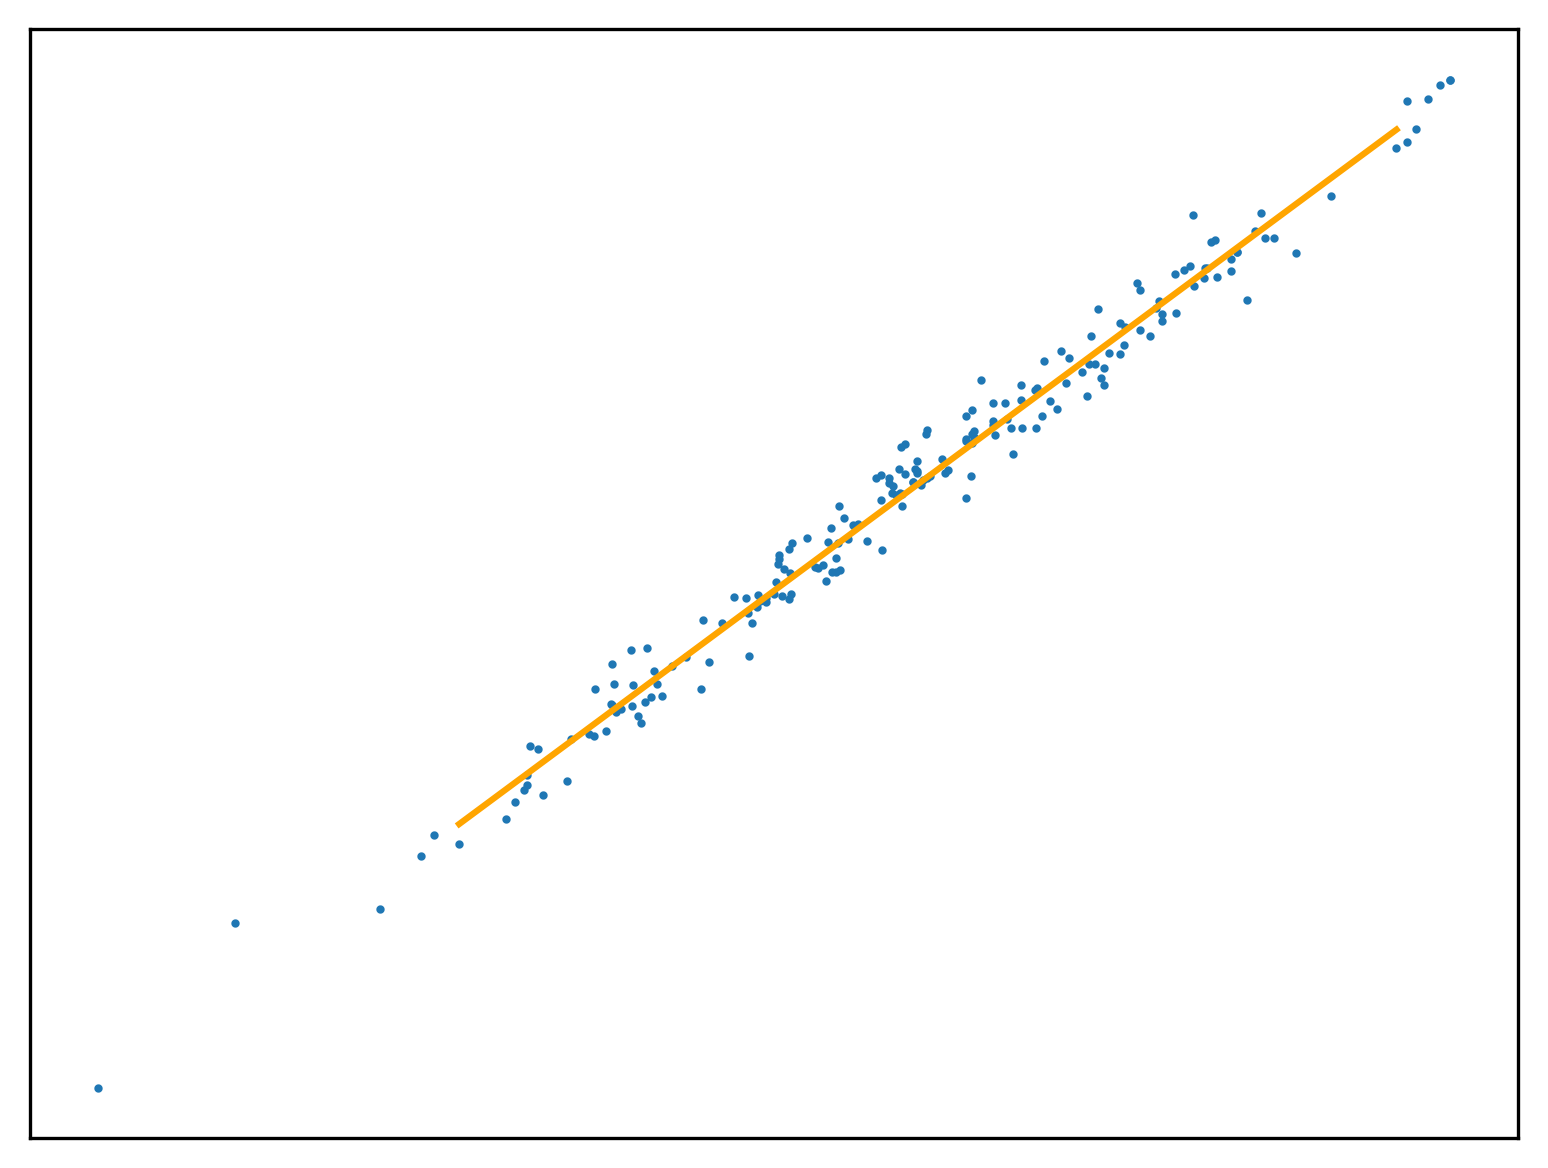

In [4]:
def new_plot():
    fig = plt.figure(dpi=300)
    ax = fig.add_subplot(1,1,1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('auto')
    return fig, ax
fig, ax = new_plot()
ax.scatter(x,y, s=1)
ax.plot(z, f(m, z, 0), 'orange')

## Linear Regression

The process of fitting a straight line to a dataset is called *univariate linear regression*.

A linear function is of the form $y=mx+c$, or in data science $y=w_1x+w_0$. The vector $\mathbf{w}$ is the vector of weights in a linear equation: $\langle w_0, w_1 \rangle$. The function of $x$ with weights $\mathbf{w}$ is:

$$h_{\mathbf{w}}=w_1x+w_0$$

## Loss Function

The loss for a single example:

$$g(w_0, w_1) = (h_{\mathbf{w}}(x) - y)^2$$

Average loss over many examples:

$$g(w_0, w_1) = \frac{1}{N}\sum_{n=1}^{N}(h_{\mathbf{w}}(x_n) - y_n)^2$$

These two functions, expressed in code:

In [5]:
def _mse(y_pred, y_actual):
    return (y_pred - y_actual) ** 2

def mse(y_actual, y_pred):
    loss = 0.0
    for i in range(y_actual.size):
        loss += _mse(y_pred[i], y_actual[i])
    return loss/y_actual.size

Compare the cost for the fitted line (the coefficeint is already know) with a line of gradient 1:

In [6]:
print(mse(y, f(m, x, 0)))
print(mse(y, f(1, x, 0)))

28.720375344961354
1722.5935283005165


## Gradient Descent

To perform regression, a function must be fitted to a dataset. For univariate linear regression, the paramaters can be computed exactly from the derivative of the loss function, though a different approach is required in the general case.

The weight space is traversed to find a suitable minimum by repeatedly adjusting the paramaters for each iteration, making a small step in the direction of steepest descent, according to the *learning rate* $\alpha$. If the loss represents how poor the current model is on a training example, the learning process should **minimise** this loss and hence the term *gradient descent* is preffered over hill-climbing.

Where $\mathbf{w}$ is the vector of weights as before, the gradient descent algorithm updates each weight by taking the partial derivative of the losss function $L$ with respect to that weight for each point $x$.

$$w_i \leftarrow w_i - \alpha \frac{\delta}{\delta w_i}L(x)$$

In [7]:
def SGD1(a, w_0, w_1, y, x):
    for i in range(x.size):
        w_0 -= (a * (f(w_1, x[i], w_0) - y[i]))
        w_1 -= (a * (f(w_1, x[i], w_0) - y[i]) * x[i])
    return w_0, w_1

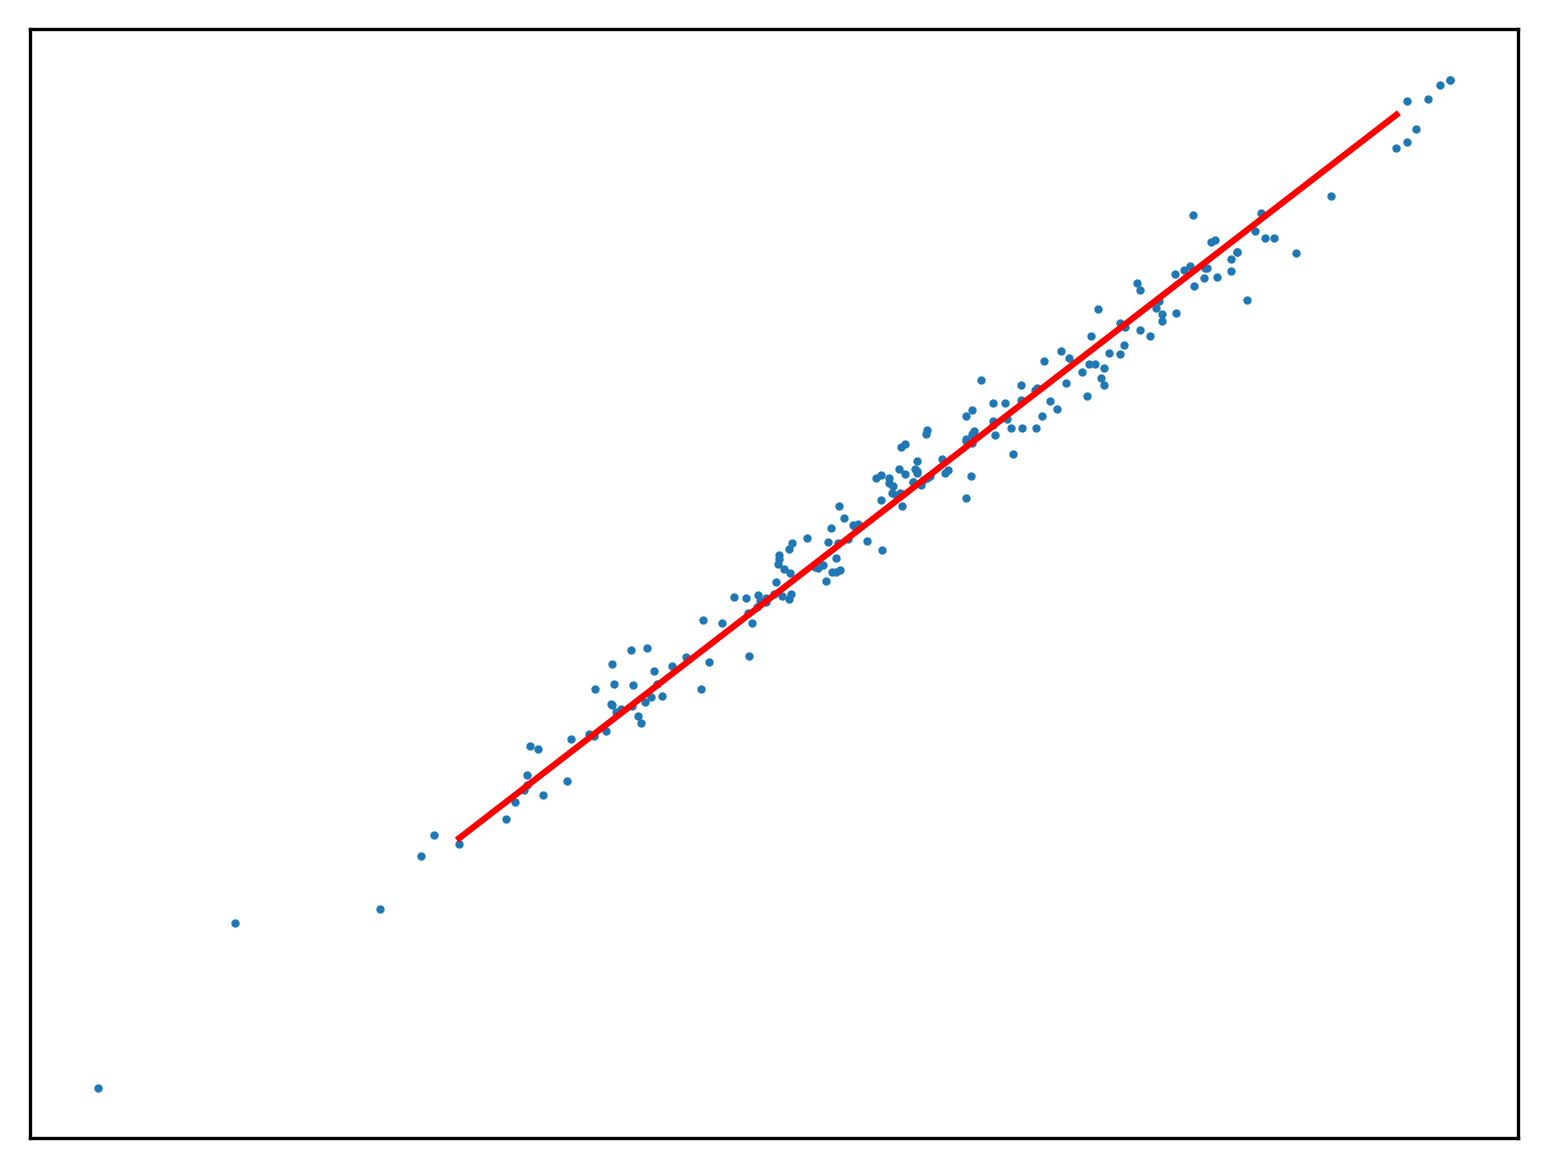

In [8]:
w_0 = w_1 = 0.0
w_0, w_1 = SGD1(0.1, w_0, w_1, y, x)

fig, ax = new_plot()
ax.scatter(x,y, s=1)
ax.plot(z, f(w_1, z, w_0), 'red')

## Deterministic Gradient Descent

In [9]:
def DGD1(a, w_0, w_1, y, x):
    w_0 -= (a * sum([f(w_1, x[i], w_0) - y[i] for i in range(x.size)]))
    w_1 -= (a * sum([(f(w_1, x[i], w_0) - y[i]) * x[i] for i in range(x.size)]))
    return w_0, w_1

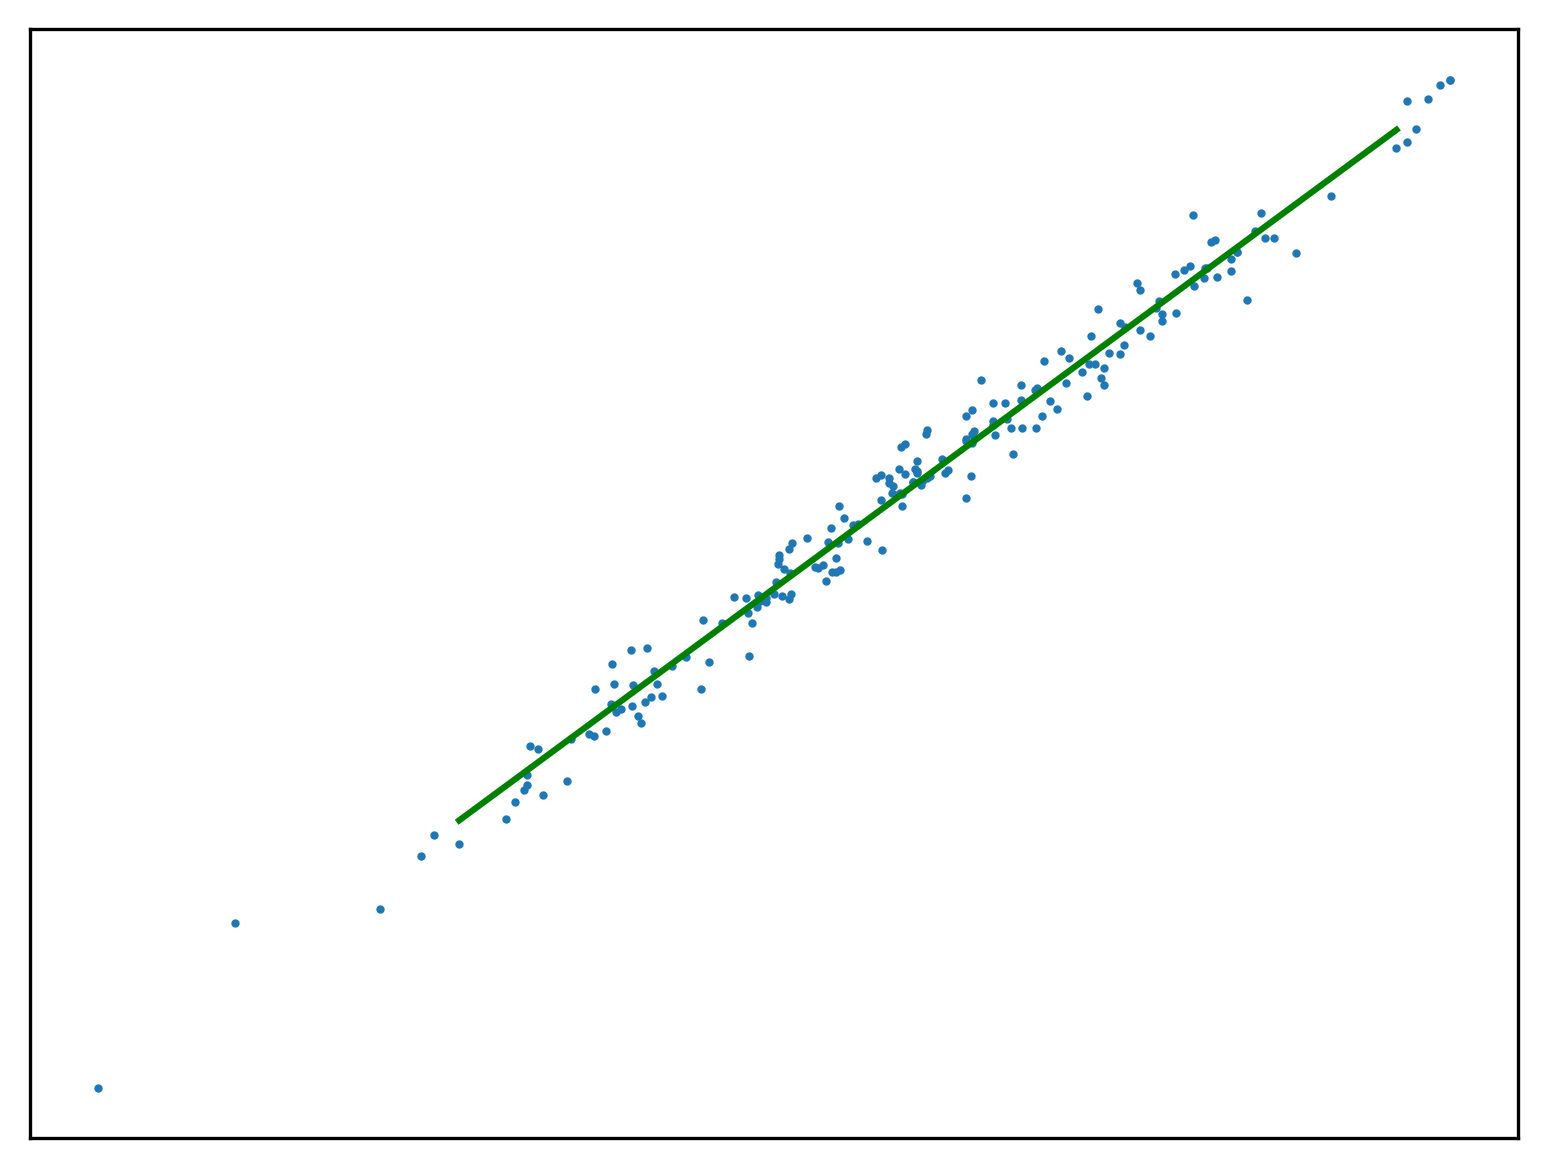

In [10]:
w_0 = w_1 = 0.0

for _ in range(100):
    w_0, w_1 = DGD1(0.001, w_0, w_1, y, x)

fig, ax = new_plot()
ax.scatter(x,y, s=1)
ax.plot(z, f(w_1, z, w_0), 'green')

## Mini-batch Gradient Descent

In [11]:
def SGD(a, n, w_0, w_1, y, x):
    x = x.reshape(-1, n)
    y = y.reshape(-1, n)
    for i in range(x.shape[0]):
        w_0 -= (a * sum([f(w_1, x[i][j], w_0) - y[i][j] for j in range(x[i].shape[0])]))
        w_1 -= (a * sum([(f(w_1, x[i][j], w_0) - y[i][j]) * x[i][j] for j in range(x[i].shape[0])]))
    return w_0, w_1

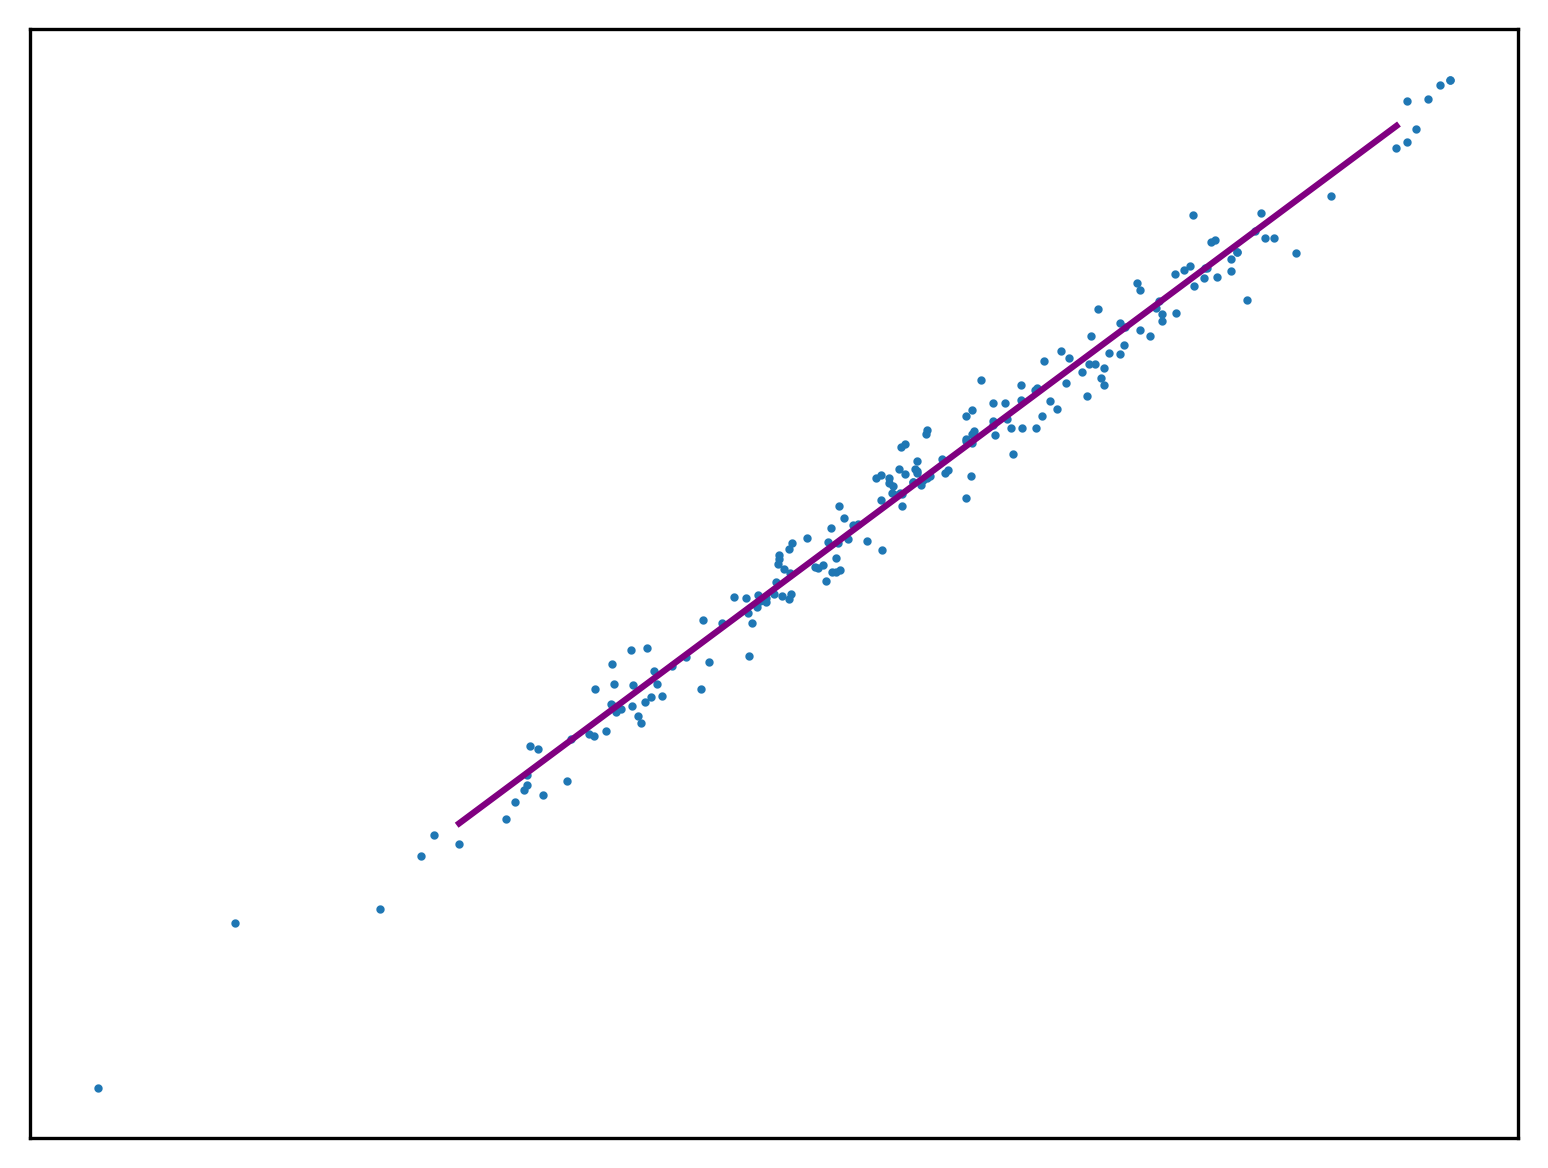

In [12]:
w_0 = w_1 = 0.0

for _ in range(1000):
    w_0, w_1 = SGD(0.01, 10, w_0, w_1, y, x)

fig, ax = new_plot()
ax.scatter(x,y, s=1)
ax.plot(z, f(w_1, z, w_0), 'purple')

## Multivariable Linear Regression

multivariable linear regression applies to problems where each member of the dataset is a *n*-variable vector, rather than a single value.

$$h_\mathbf{w}(\mathbf{x}_j) = w_0 + w_ix_{j,1} + \cdots +w_nx_{j,n} = w_0 + \sum_{i=1}^{n}w_ix_{j,i}$$

The weight $w_0$ is the intercept. The function $h_\mathbf{w}$ can be simplified by introducing a new variable $x_0$ with the value 1, making $h_\mathbf{w}$ the product of the transposed weight vector with each corresponding element in $x$, $x_j$:

$$h_\mathbf{w}(\mathbf{x}_j) = \mathbf{w^{T}x_j} = \sum_{i = 0}^{n}w_ix_{j,i}$$

With this assignment, the partial derivative of the loss function with respect to each $w$ is the same.

$$w_i \leftarrow w_i - \alpha \sum_j(h_{\mathbf{w}}(\mathbf{x}_j) - y_j) \times x_{j,i}$$

In [13]:
def create_minibatches(a, m):
    n = int(x.shape[0] / m)
    return np.array_split(a[:m * n], n), n

def h(W, X):
    return sum(W * X)

In [14]:
def vector_SGD(a, m, W, y, X):
    X = np.concatenate((np.ones((200,1), dtype=int), X), axis=1)
    X, n = create_minibatches(X, m)
    y, n = create_minibatches(y, m)
    for b in range(n):
        for w in range(W.size):
            W[w] -= a * sum([((h(W, X[b][x])) - y[b][x]) * X[b][x][w] for x in range(X[b].shape[0])])
    return W

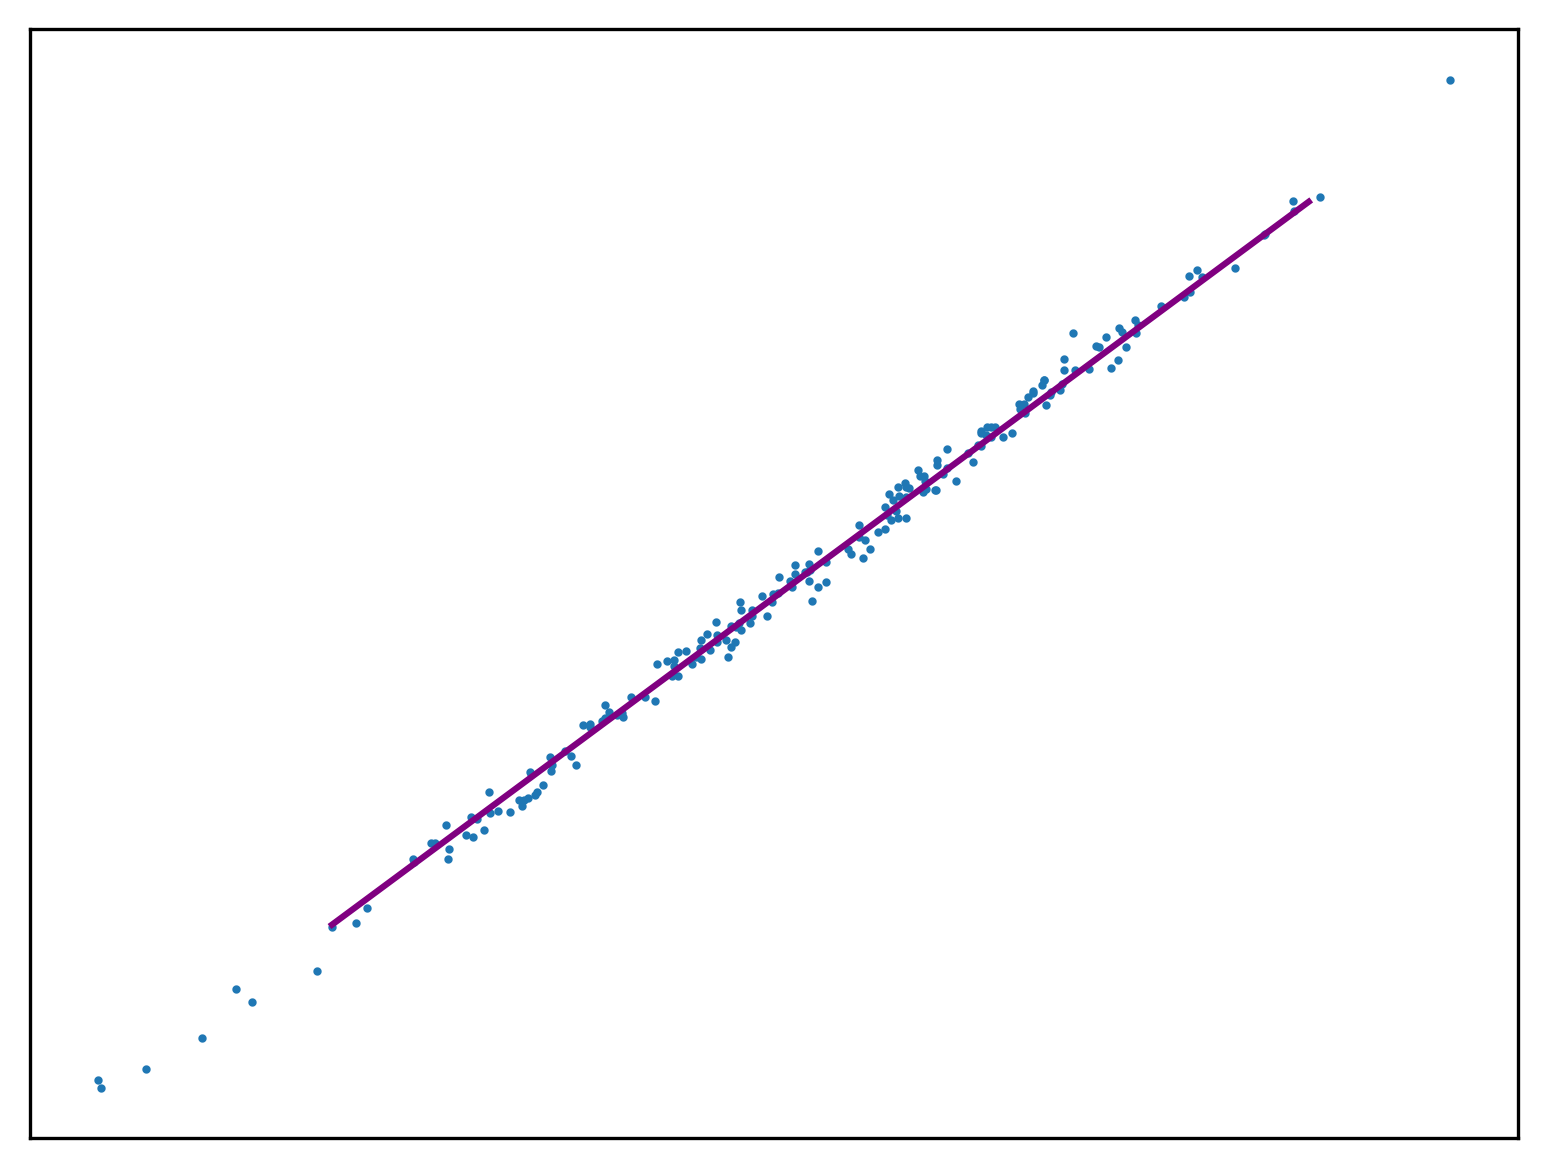

In [15]:
r = sklearn.datasets.make_regression(n_samples = 200, n_features = 1, noise=5.5, coef=True)
X = r[0]
y = r[1]
W = np.array([0,1])
W = vector_SGD(0.1, 10, W, y, X)
Z = np.concatenate((np.ones((100,1), dtype=int), np.linspace(-2, 2, 100).reshape(100,1)), axis=1)

fig, ax = new_plot()
ax.scatter(X,y, s=1)
ax.plot([Z[i][1] for i in range(Z.shape[0])], [h(W, Z[i]) for i in range(Z.shape[0])], 'purple')

In [16]:
Z = np.concatenate((np.ones((100,1), dtype=int), np.linspace(-2, 2, 200).reshape(100,2)), axis=1)

[ 0 68 26]
[68.19423322 26.38229508]


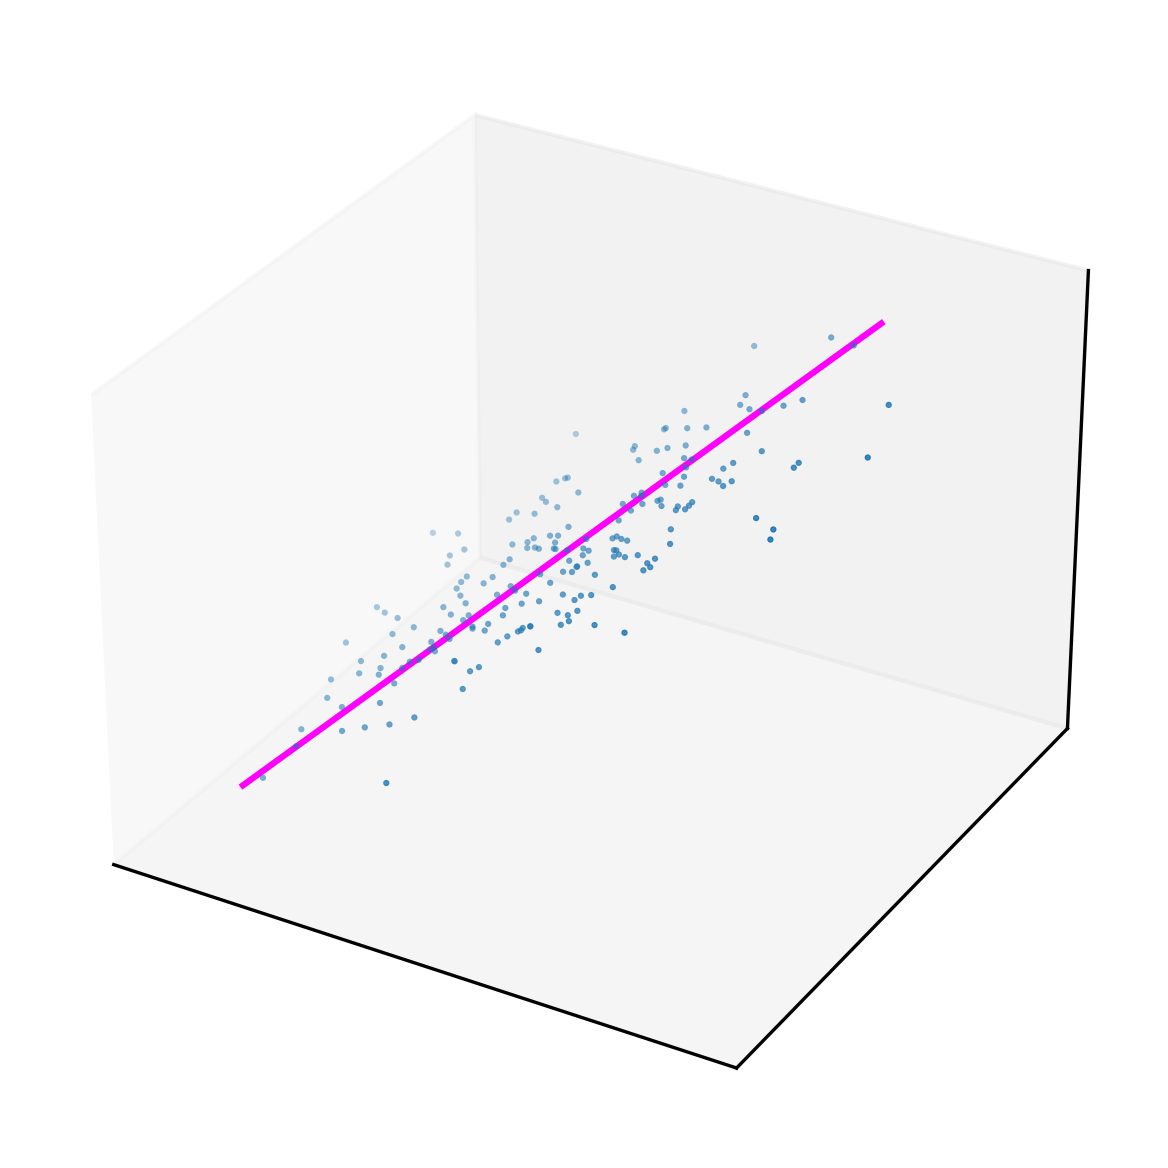

In [17]:
r = sklearn.datasets.make_regression(n_samples = 200,
                                     n_features = 2, noise=0.1,
                                     coef=True)
X = r[0]
y = r[1]

x1 = np.array([X[i][0] for i in range(X.shape[0])])
x2 = np.array([X[i][1] for i in range(X.shape[0])])

W = np.array([0,1,1])
W = vector_SGD(0.1, 10, W, y, X)
print(W)
print(r[2])

fig = plt.figure(dpi=300)
ax = fig.add_subplot(projection='3d')
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.grid()
ax.scatter(x1,x2,r[1], s=1, marker='.')

ax.plot([Z[i][1] for i in range(Z.shape[0])], [Z[i][2] for i in range(Z.shape[0])], [h(W, Z[i]) for i in range(Z.shape[0])], color='magenta')